In [2]:
!pip install --upgrade ydata-profiling

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

C:\Users\rudaf\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rudaf\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
listing_df1 = pd.read_csv('./Data/listings.csv')
listing_df=listing_df1.dropna(subset=['price','room_type','reviews_per_month','availability_365'])
print(len(listing_df),len(listing_df1))
listing_df.columns

11388 13274


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [4]:
room_types=listing_df['room_type'].unique()
group_by_room_type=listing_df.groupby('room_type')

         room_type  mean_reviews_per_month  mean_number_of_leases_next_year
0  Entire home/apt                1.850726                        22.208708
1     Private room                0.825818                         9.909818
2       Hotel room                1.114647                        13.375769
3      Shared room                1.259556                        15.114667


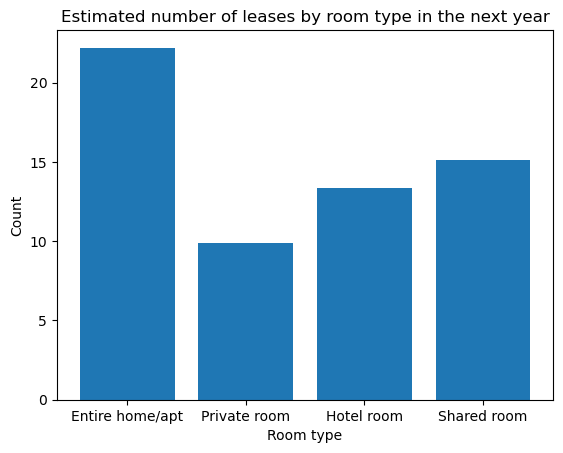

In [11]:
# Análisis de cantidad de arrendamientos en los próximos 365 días por tipo de habitación
mean_reviews_per_month_by_room_type=group_by_room_type['reviews_per_month'].mean().values
mean_number_of_leases_next_year=12*mean_reviews_per_month_by_room_type
room_type_leases_report=pd.DataFrame({'room_type':room_types,'mean_reviews_per_month':mean_reviews_per_month_by_room_type,
                                      'mean_number_of_leases_next_year':mean_number_of_leases_next_year})

print(room_type_leases_report)

plt.bar(height=room_type_leases_report['mean_number_of_leases_next_year'],x=room_type_leases_report['room_type'])
plt.title('Estimated number of leases by room type in the next year')
plt.xlabel('Room type')
plt.ylabel('Count')

#plt.savefig('./Diagrams/Estimated number of leases by room type in the next year.png')

plt.show()


         room_type  count  mean_price
0  Entire home/apt  10735  106.068188
1     Private room    553  339.909091
2       Hotel room     55   68.620253
3      Shared room     45   24.955556


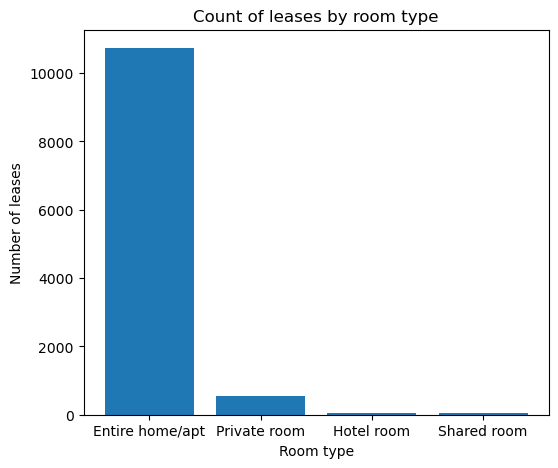

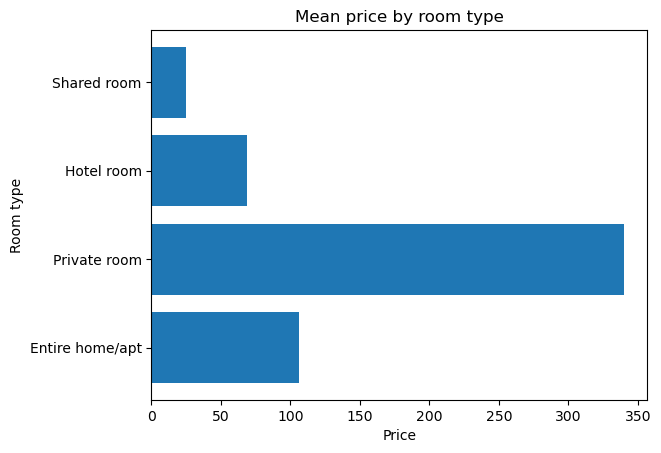

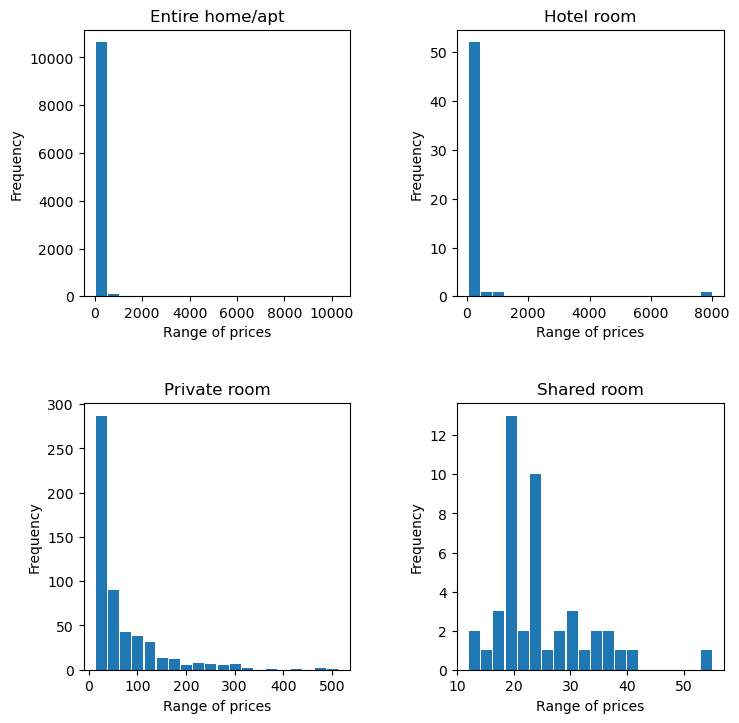

In [12]:
# Análisis de precios por tipo de habitación
mean_price_by_room_type=group_by_room_type['price'].mean().values
count_by_room_type=listing_df['room_type'].value_counts().values
room_type_price_report=pd.DataFrame({'room_type':room_types,'count':count_by_room_type,'mean_price':mean_price_by_room_type})

print(room_type_price_report)

plt.figure(figsize=(6,5))
plt.bar(height=room_type_price_report['count'],x=room_type_price_report['room_type'])
plt.title('Count of leases by room type')
plt.ylabel('Number of leases')
plt.xlabel('Room type')
#plt.savefig('./Diagrams/Count of leases by room type.png')
plt.show()

## Distribución de precios por tipo de habitación
prices_by_room_type=group_by_room_type['price']

plt.figure()
plt.barh(width=room_type_price_report['mean_price'],y=room_type_price_report['room_type'])
plt.title('Mean price by room type')
plt.xlabel('Price')
plt.ylabel('Room type')
#plt.savefig('./Diagrams/Mean price by room type.png')
plt.show()

plt.figure(figsize=(8,8))
i=1
for room,dist in prices_by_room_type:
    plt.subplot(2,2,i)
    plt.hist(dist,bins=20,rwidth=0.9,align='mid')
    plt.title(room)
    plt.xlabel('Range of prices')
    plt.ylabel('Frequency')
    i+=1
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
#plt.savefig('./Diagrams/Range of prices by room type.png')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████| 10837/10837 [00:05<00:00, 2023.75it/s]


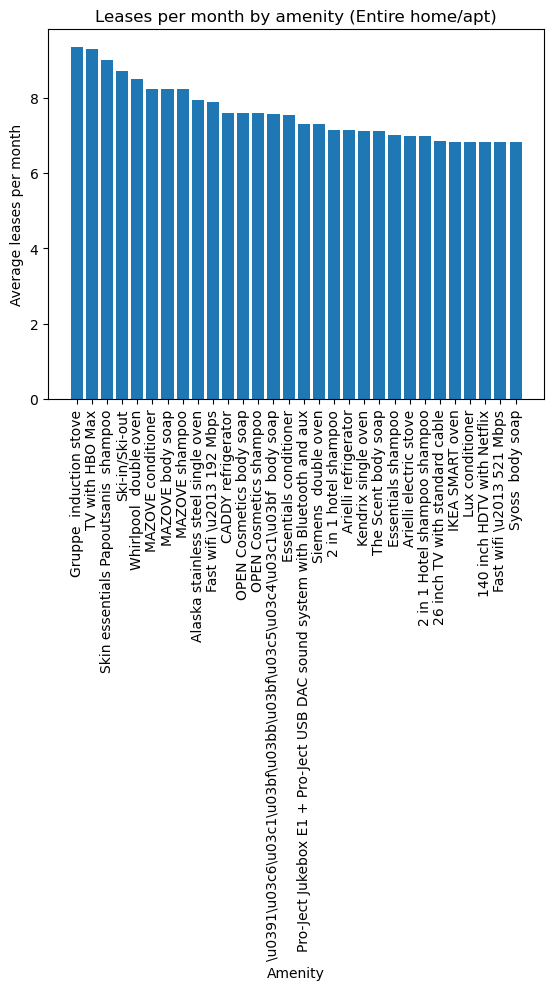

['Gruppe  induction stove' 'TV with HBO Max'
 'Skin essentials Papoutsanis  shampoo' 'Ski-in/Ski-out'
 'Whirlpool  double oven' 'MAZOVE conditioner' 'MAZOVE body soap'
 'MAZOVE shampoo' 'Alaska stainless steel single oven'
 'Fast wifi \\u2013 192 Mbps' 'CADDY refrigerator'
 'OPEN Cosmetics body soap' 'OPEN Cosmetics shampoo'
 '\\u0391\\u03c6\\u03c1\\u03bf\\u03bb\\u03bf\\u03c5\\u03c4\\u03c1\\u03bf  body soap'
 'Essentials conditioner'
 'Pro-Ject Jukebox E1 + Pro-Ject USB DAC sound system with Bluetooth and aux'
 'Siemens  double oven' '2 in 1 hotel shampoo' 'Arielli refrigerator'
 'Kendrix single oven' 'The Scent body soap' 'Essentials shampoo'
 'Arielli electric stove' '2 in 1 Hotel shampoo shampoo'
 '26 inch TV with standard cable' 'IKEA SMART oven' 'Lux conditioner'
 '140 inch HDTV with Netflix' 'Fast wifi \\u2013 521 Mbps'
 'Syoss  body soap']


100%|██████████████████████████████████████████████████████████████████████████████| 571/571 [00:00<00:00, 2253.82it/s]


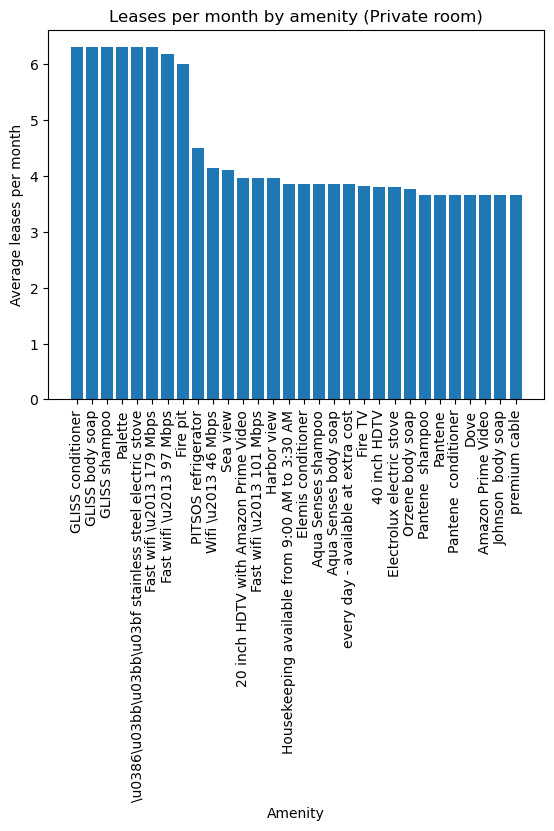

['GLISS conditioner' 'GLISS body soap' 'GLISS shampoo' 'Palette'
 '\\u0386\\u03bb\\u03bb\\u03bf stainless steel electric stove'
 'Fast wifi \\u2013 179 Mbps' 'Fast wifi \\u2013 97 Mbps' 'Fire pit'
 'PITSOS refrigerator' 'Wifi \\u2013 46 Mbps' 'Sea view'
 '20 inch HDTV with Amazon Prime Video' 'Fast wifi \\u2013 101 Mbps'
 'Harbor view' 'Housekeeping available from 9:00 AM to 3:30 AM'
 'Elemis conditioner' 'Aqua Senses shampoo' 'Aqua Senses body soap'
 'every day - available at extra cost' 'Fire TV' '40 inch HDTV'
 'Electrolux electric stove' 'Orzene body soap' 'Pantene  shampoo'
 'Pantene' 'Pantene  conditioner' 'Dove' 'Amazon Prime Video'
 'Johnson  body soap' 'premium cable']


100%|████████████████████████████████████████████████████████████████████████████████| 56/56 [00:00<00:00, 1268.82it/s]


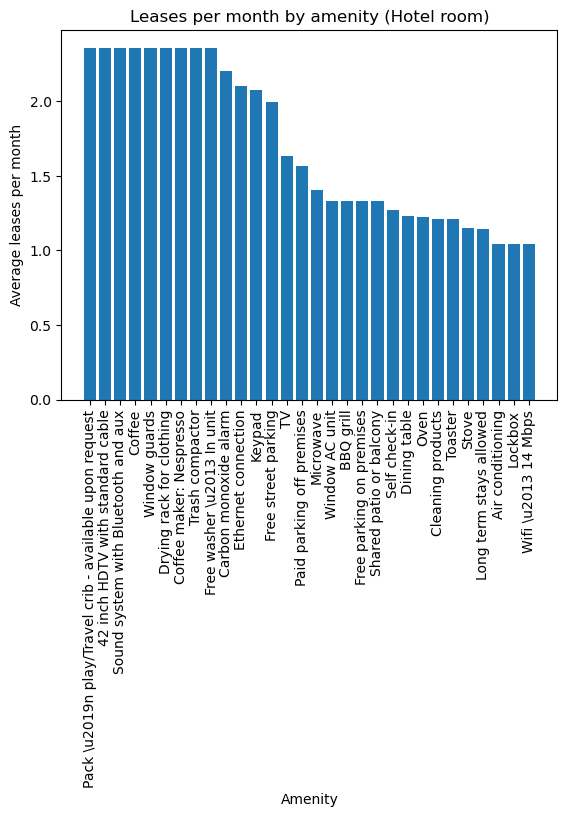

['Pack \\u2019n play/Travel crib - available upon request'
 '42 inch HDTV with standard cable' 'Sound system with Bluetooth and aux'
 'Coffee' 'Window guards' 'Drying rack for clothing'
 'Coffee maker: Nespresso' 'Trash compactor' 'Free washer \\u2013 In unit'
 'Carbon monoxide alarm' 'Ethernet connection' 'Keypad'
 'Free street parking' 'TV' 'Paid parking off premises' 'Microwave'
 'Window AC unit' 'BBQ grill' 'Free parking on premises'
 'Shared patio or balcony' 'Self check-in' 'Dining table' 'Oven'
 'Cleaning products' 'Toaster' 'Stove' 'Long term stays allowed'
 'Air conditioning' 'Lockbox' 'Wifi \\u2013 14 Mbps']


100%|████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 4591.30it/s]


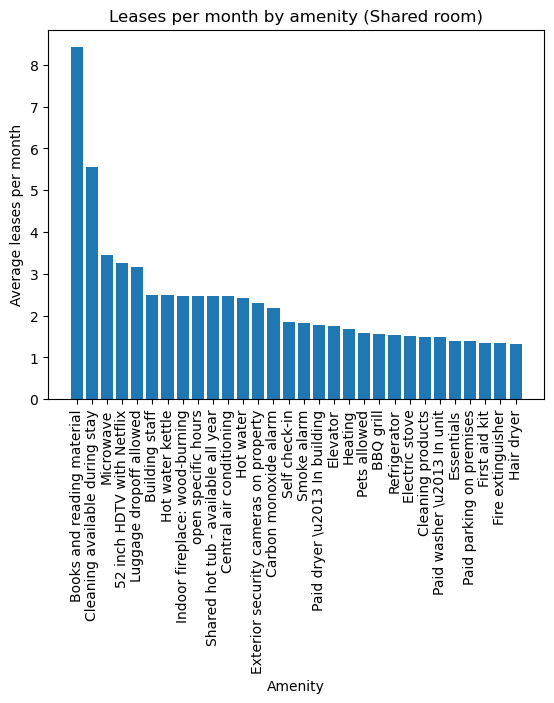

['Books and reading material' 'Cleaning available during stay' 'Microwave'
 '52 inch HDTV with Netflix' 'Luggage dropoff allowed' 'Building staff'
 'Hot water kettle' 'Indoor fireplace: wood-burning' 'open specific hours'
 'Shared hot tub - available all year' 'Central air conditioning'
 'Hot water' 'Exterior security cameras on property'
 'Carbon monoxide alarm' 'Self check-in' 'Smoke alarm'
 'Paid dryer \\u2013 In building' 'Elevator' 'Heating' 'Pets allowed'
 'BBQ grill' 'Refrigerator' 'Electric stove' 'Cleaning products'
 'Paid washer \\u2013 In unit' 'Essentials' 'Paid parking on premises'
 'First aid kit' 'Fire extinguisher' 'Hair dryer']


In [8]:
# Comodidades con más reservas por mes
listing_df2 = pd.read_csv('./Data/listings/listings.csv')
listing_dfc=listing_df2.dropna(subset=['amenities','reviews_per_month'])

for room_type in room_types:
    listing_by_room_type=listing_dfc[listing_dfc['room_type']==room_type]
    amenities_info={}
    for i in tqdm(range(len(listing_by_room_type))):
        amenities=listing_by_room_type['amenities'].iloc[i].replace('[','').replace(']','').replace('"','').split(', ')
        for amenity in amenities:
            if amenity not in amenities_info:
                amenities_info[amenity]={'sum':listing_by_room_type['reviews_per_month'].iloc[i],'count':1}
            else:
                amenities_info[amenity]['sum']+=listing_by_room_type['reviews_per_month'].iloc[i]
                amenities_info[amenity]['count']+=1

    amenities_score={}
    for amenity in amenities_info:
        amenities_score[amenity]=amenities_info[amenity]['sum']/amenities_info[amenity]['count']

    amenities_df=pd.DataFrame({'amenity':amenities_score.keys(),'score':amenities_score.values()})
    top_amenities=amenities_df.sort_values(by='score',ascending=False).head(30)
    
    plt.figure()
    plt.bar(height=top_amenities['score'],x=top_amenities['amenity'])
    plt.title('Leases per month by amenity ({})'.format(room_type))
    plt.xlabel('Amenity')
    plt.ylabel('Average leases per month')
    plt.xticks(rotation=90)
    #if '/' in room_type:
    #    plt.savefig("./Diagrams/Leases per month by amenity (Entire house-apt).png")
    #else:
    #    plt.savefig("./Diagrams/Leases per month by amenity ({}).png".format(room_type))
    plt.show()
    
    print(np.array(top_amenities['amenity']))


100%|█████████████████████████████████████████████████████████████████████████| 10735/10735 [00:00<00:00, 12368.98it/s]


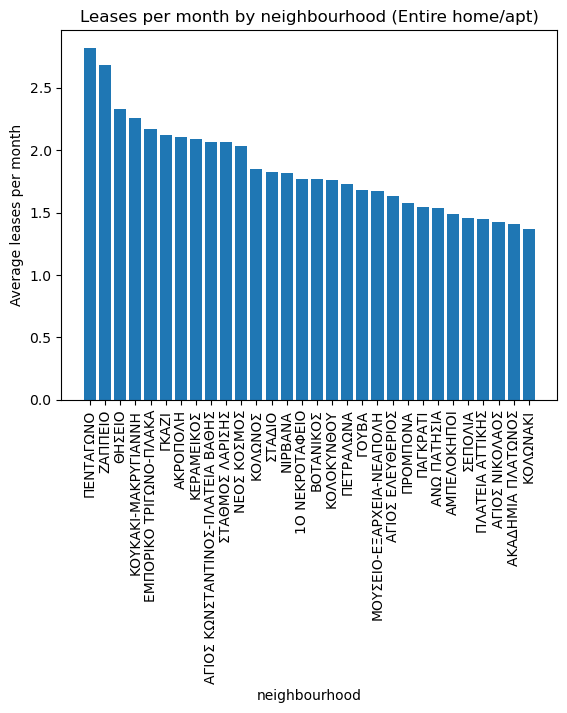

['ΠΕΝΤΑΓΩΝΟ' 'ΖΑΠΠΕΙΟ' 'ΘΗΣΕΙΟ' 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ'
 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ' 'ΓΚΑΖΙ' 'ΑΚΡΟΠΟΛΗ' 'ΚΕΡΑΜΕΙΚΟΣ'
 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ' 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ' 'ΝΕΟΣ ΚΟΣΜΟΣ'
 'ΚΟΛΩΝΟΣ' 'ΣΤΑΔΙΟ' 'ΝΙΡΒΑΝΑ' '1Ο ΝΕΚΡΟΤΑΦΕΙΟ' 'ΒΟΤΑΝΙΚΟΣ' 'ΚΟΛΟΚΥΝΘΟΥ'
 'ΠΕΤΡΑΛΩΝΑ' 'ΓΟΥΒΑ' 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ' 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ'
 'ΠΡΟΜΠΟΝΑ' 'ΠΑΓΚΡΑΤΙ' 'ΑΝΩ ΠΑΤΗΣΙΑ' 'ΑΜΠΕΛΟΚΗΠΟΙ' 'ΣΕΠΟΛΙΑ'
 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ' 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ' 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ' 'ΚΟΛΩΝΑΚΙ']


100%|█████████████████████████████████████████████████████████████████████████████| 553/553 [00:00<00:00, 10485.48it/s]


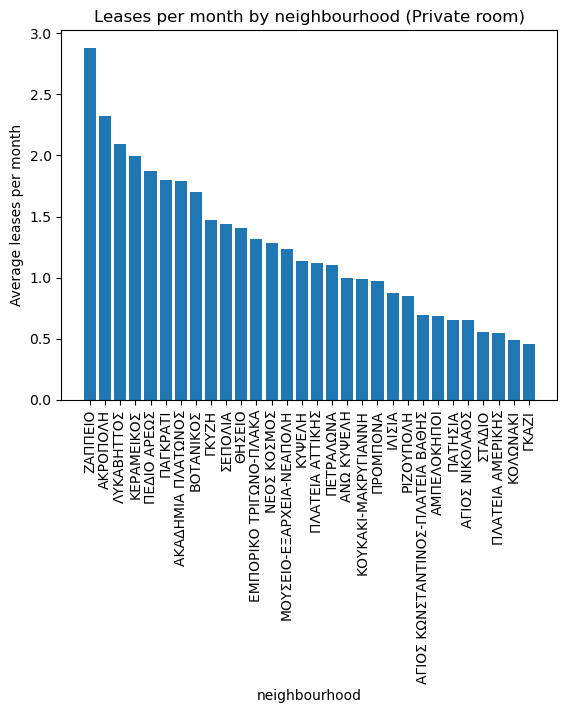

['ΖΑΠΠΕΙΟ' 'ΑΚΡΟΠΟΛΗ' 'ΛΥΚΑΒΗΤΤΟΣ' 'ΚΕΡΑΜΕΙΚΟΣ' 'ΠΕΔΙΟ ΑΡΕΩΣ' 'ΠΑΓΚΡΑΤΙ'
 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ' 'ΒΟΤΑΝΙΚΟΣ' 'ΓΚΥΖΗ' 'ΣΕΠΟΛΙΑ' 'ΘΗΣΕΙΟ'
 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ' 'ΝΕΟΣ ΚΟΣΜΟΣ' 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ'
 'ΚΥΨΕΛΗ' 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ' 'ΠΕΤΡΑΛΩΝΑ' 'ΑΝΩ ΚΥΨΕΛΗ' 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ'
 'ΠΡΟΜΠΟΝΑ' 'ΙΛΙΣΙΑ' 'ΡΙΖΟΥΠΟΛΗ' 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ'
 'ΑΜΠΕΛΟΚΗΠΟΙ' 'ΠΑΤΗΣΙΑ' 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ' 'ΣΤΑΔΙΟ' 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ'
 'ΚΟΛΩΝΑΚΙ' 'ΓΚΑΖΙ']


100%|███████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 11825.24it/s]


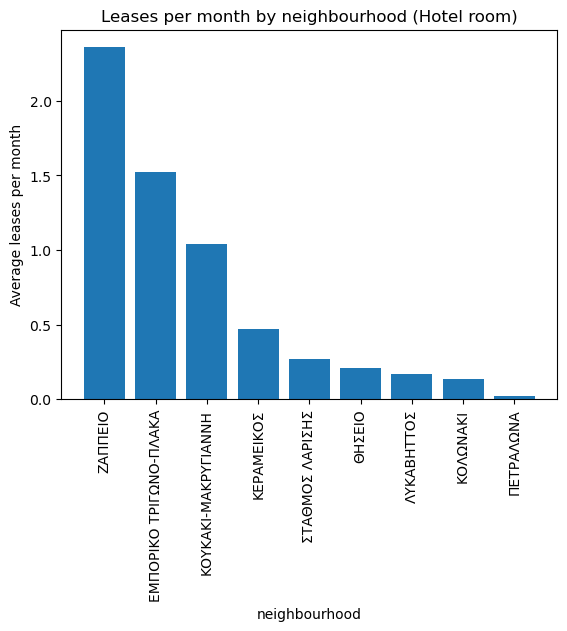

['ΖΑΠΠΕΙΟ' 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ' 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ' 'ΚΕΡΑΜΕΙΚΟΣ'
 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ' 'ΘΗΣΕΙΟ' 'ΛΥΚΑΒΗΤΤΟΣ' 'ΚΟΛΩΝΑΚΙ' 'ΠΕΤΡΑΛΩΝΑ']


100%|████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 9616.04it/s]


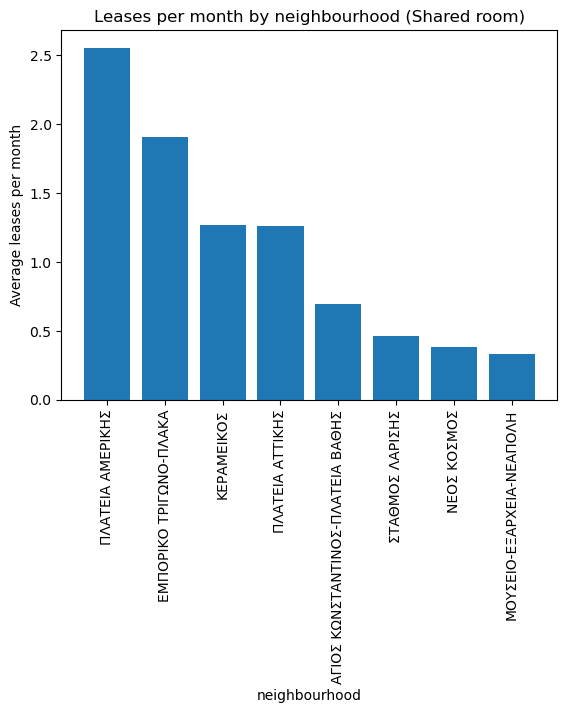

['ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ' 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ' 'ΚΕΡΑΜΕΙΚΟΣ'
 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ' 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ' 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ'
 'ΝΕΟΣ ΚΟΣΜΟΣ' 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ']


In [10]:
# Vecindarios con más reservas por mes

for room_type in room_types:
    listing_by_room_type=listing_df[listing_df['room_type']==room_type]
    neighbourhoods_info={}
    for i in tqdm(range(len(listing_by_room_type))):
        neighbourhood=listing_by_room_type.iloc[i]['neighbourhood']
        if neighbourhood not in neighbourhoods_info:
            neighbourhoods_info[neighbourhood]={'sum':listing_by_room_type['reviews_per_month'].iloc[i],'count':1}
        else:
            neighbourhoods_info[neighbourhood]['sum']+=listing_by_room_type['reviews_per_month'].iloc[i]
            neighbourhoods_info[neighbourhood]['count']+=1

    neighbourhoods_score={}
    for neighbourhood in neighbourhoods_info:
        neighbourhoods_score[neighbourhood]=neighbourhoods_info[neighbourhood]['sum']/neighbourhoods_info[neighbourhood]['count']

    neighbourhoods_df=pd.DataFrame({'neighbourhood':neighbourhoods_score.keys(),'score':neighbourhoods_score.values()})
    top_neighbourhoods=neighbourhoods_df.sort_values(by='score',ascending=False).head(30)
    
    plt.figure()
    plt.bar(height=top_neighbourhoods['score'],x=top_neighbourhoods['neighbourhood'])
    plt.title('Leases per month by neighbourhood ({})'.format(room_type))
    plt.xlabel('neighbourhood')
    plt.ylabel('Average leases per month')
    plt.xticks(rotation=90)
    #if '/' in room_type:
    #    plt.savefig("./Diagrams/Leases per month by neighbourhood (Entire house-apt).png")
    #else:
    #    plt.savefig("./Diagrams/Leases per month by neighbourhood ({}).png".format(room_type))
    plt.show()
    
    print(np.array(top_neighbourhoods['neighbourhood']))